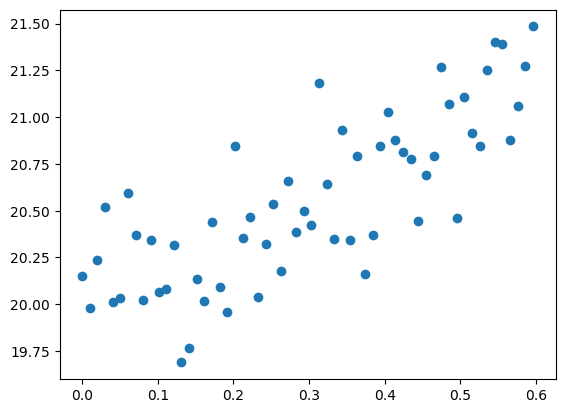

Epoch 0: w0=-0.6116382490366743, w1=0.5723029455112432, mse=460.60028076171875
Epoch 10: w0=3.1979492296010212, w1=1.712820113556287, mse=296.47454833984375
Epoch 20: w0=6.254590236070747, w1=2.622655356781385, mse=190.9145050048828
Epoch 30: w0=8.707384749773137, w1=3.347518328087232, mse=123.0211181640625
Epoch 40: w0=10.675906363847846, w1=3.9240664657520266, mse=79.3531494140625
Epoch 50: w0=12.25604900491535, w1=4.381697758095168, mse=51.265750885009766
Epoch 60: w0=13.524716426256296, w1=4.743988157169722, mse=33.19904708862305
Epoch 70: w0=14.543582917574046, w1=5.029844699757003, mse=21.577186584472656
Epoch 80: w0=15.362109342935682, w1=5.2544300302433005, mse=14.100353240966797
Epoch 90: w0=16.019961649301646, w1=5.429903984920881, mse=9.289427757263184
Epoch 100: w0=16.548950778368116, w1=5.566018185274505, mse=6.193108081817627
Epoch 110: w0=16.97458793771565, w1=5.670592927591702, mse=4.199550151824951
Epoch 120: w0=17.31733235252202, w1=5.749899723784824, mse=2.9152741432

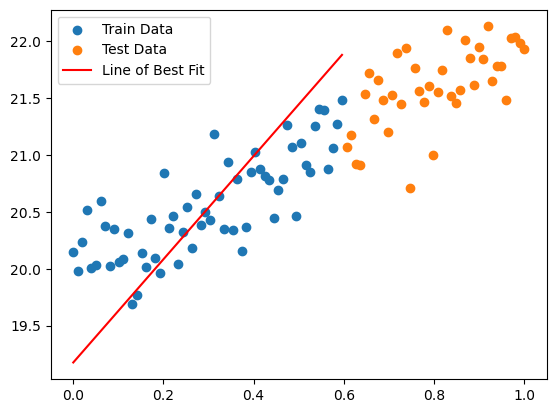

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Load the training data from CSV
with open('lab_1_train.csv', 'r') as f:
    reader = csv.reader(f)
    train_data = list(reader)[1:]  # skip header row
train_data = np.array(train_data, dtype=np.float32)

# Load the test data from CSV
with open('lab_1_test.csv', 'r') as f:
    reader = csv.reader(f)
    test_data = list(reader)[1:]  # skip header row
test_data = np.array(test_data, dtype=np.float32)

# Extract x and y columns from the training data
x_train = train_data[:, 1]
y_train = train_data[:, 2]

plt.scatter(x_train, y_train)
plt.show()

# Extract x and y columns from the test data
x_test = test_data[:, 1]
y_test = test_data[:, 2]

# Initialize the weights with random values
w0 = np.random.randn()
w1 = np.random.randn()

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 1000

# Perform gradient descent to find the optimal weights
for epoch in range(num_epochs):
    # Calculate the predicted y values for the current weights
    y_pred = w0 + w1 * x_train
    
    # Calculate the mean squared error (MSE) loss
    mse = np.mean((y_pred - y_train)**2)
    
    # Calculate the gradients of the loss with respect to w0 and w1
    dw0 = 2 * np.mean(y_pred - y_train)
    dw1 = 2 * np.mean((y_pred - y_train) * x_train)
    
    # Update the weights using the gradients and learning rate
    w0 -= learning_rate * dw0
    w1 -= learning_rate * dw1
    
    # Print the current weights and loss every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: w0={w0}, w1={w1}, mse={mse}")
        
# Calculate the predicted y values for the test data using the optimal weights
y_pred_test = w0 + w1 * x_test

# Calculate the mean squared error (MSE) loss for the test data
mse_test = np.mean((y_pred_test - y_test)**2)
print(f"Test MSE: {mse_test}")

# Plot the training data, test data, and the line of best fit
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, label="Test Data")
plt.plot(x_train, w0 + w1 * x_train, color='red', label="Line of Best Fit")
plt.legend()
plt.show()